In [28]:
import scipy.io
import numpy as np
from matplotlib import pyplot as plt

In [29]:
def PowerIteration(A,v):
    """
        Given a square matrix A and a column vector v of matching size to initialize 
        the iteration this function implements the power iteration to approximate the 
        largest Eigenvalue of A. It returns a list of successive approximations where 
        the last approximation is the best one.
    """
    lamda_ = np.zeros((100,1))
    for k in range(1, 101):
        w = A@v
        v = w/np.linalg.norm(w)
        lamda_[k-1] = v.T@A@v
    return lamda_
    


def RayleighQuotientIteration(A,v):
    """
        Given a square matrix A and a column vector v of matching size to initialize 
        the iteration this function implements the Rayleigh quotient iteration to 
        approximate the Eigenvalue of A whose Eigenvector is closest to v. It returns 
        a list of successive approximations where the last approximation is the best 
        one.
    """
    lamda_ = np.zeros((101,1))
    lamda_[0] = v.T@A@v
    
    for k in range(1, 101):
        w = np.linalg.solve(A-lamda_[k-1]*np.eye(A.shape[0]), v)
        v = w/np.linalg.norm(w)
        lamda_[k] = v.T@A@v
    
    return lamda_

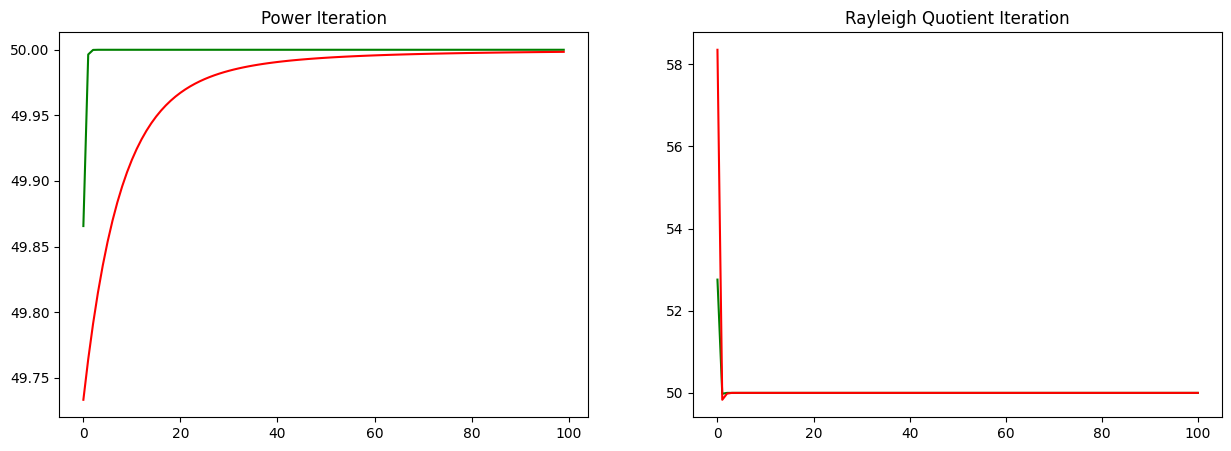

In [30]:
Matrizen=scipy.io.loadmat("Matrizen.mat")
A1=Matrizen["A1"]
A2=Matrizen["A2"]
Startvektor = Matrizen["Startvektor"]

fig, (ax1, ax2)  = plt.subplots(1, 2, figsize=(15, 5))
ax1.set_title('Power Iteration')
LambdaList=PowerIteration(A1, Startvektor)
ax1.plot(LambdaList,color="g")
LambdaList=PowerIteration(A2, Startvektor)
ax1.plot(LambdaList,color="r")

ax2.set_title("Rayleigh Quotient Iteration")
LambdaList=RayleighQuotientIteration(A1, Startvektor)
ax2.plot(LambdaList,"g")
LambdaList=RayleighQuotientIteration(A2, Startvektor)
ax2.plot(LambdaList,"r")

plt.show()